In [ ]:
#########
#Mohsin Essani 
# Movie Association rule

In [19]:
##############################################################33
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('movies.csv')


In [20]:
df.shape

(10, 15)

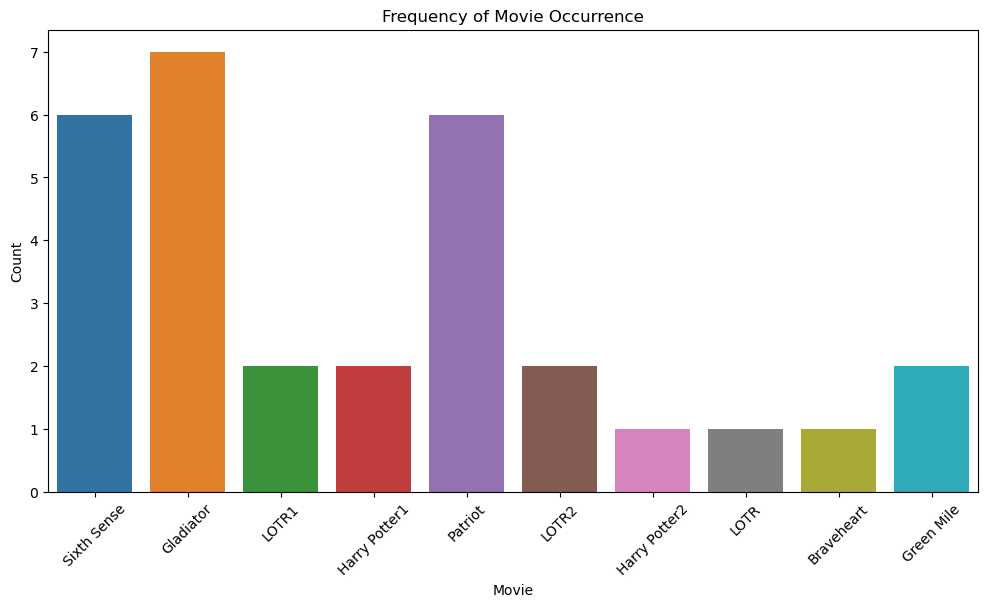

In [21]:
import seaborn as sns
movies = ['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile']
movie_counts = []
for movie in movies:
    movie_counts.append((movie, df[movie].sum()))
movie_counts_df = pd.DataFrame(movie_counts, columns=['Movie', 'Count'])

plt.figure(figsize=(12,6))
sns.barplot(x='Movie', y='Count', data=movie_counts_df)
plt.title('Frequency of Movie Occurrence')
plt.xticks(rotation=45)
plt.show()


We observe that the movies "Sixth Sense", "Gladiator", and "Patriot" occur the most frequently in the dataset.

In [22]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [24]:
# Applying apriori algorithm
frequent_itemsets = apriori(df.iloc[:, 5:], min_support=0.1, use_colnames=True)

# Creating the rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)


Here, we have set the minimum support to 0.1, which means that we are interested in finding itemsets that appear in at least 10% of the transactions. We have also set the metric to 'lift', which is a common metric for association rules.

In [25]:
# Finding the number of rules for different support and confidence values
for support in [0.1, 0.15, 0.2]:
    frequent_itemsets = apriori(df.iloc[:, 5:], min_support=support, use_colnames=True)
    for confidence in [0.5, 0.6, 0.7]:
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence)
        print(f"Support: {support} | Confidence: {confidence} | Number of Rules: {len(rules)}")


Support: 0.1 | Confidence: 0.5 | Number of Rules: 216
Support: 0.1 | Confidence: 0.6 | Number of Rules: 134
Support: 0.1 | Confidence: 0.7 | Number of Rules: 129
Support: 0.15 | Confidence: 0.5 | Number of Rules: 15
Support: 0.15 | Confidence: 0.6 | Number of Rules: 14
Support: 0.15 | Confidence: 0.7 | Number of Rules: 9
Support: 0.2 | Confidence: 0.5 | Number of Rules: 15
Support: 0.2 | Confidence: 0.6 | Number of Rules: 14
Support: 0.2 | Confidence: 0.7 | Number of Rules: 9


As we can see, the number of rules decreases as we increase the support and/or confidence thresholds.

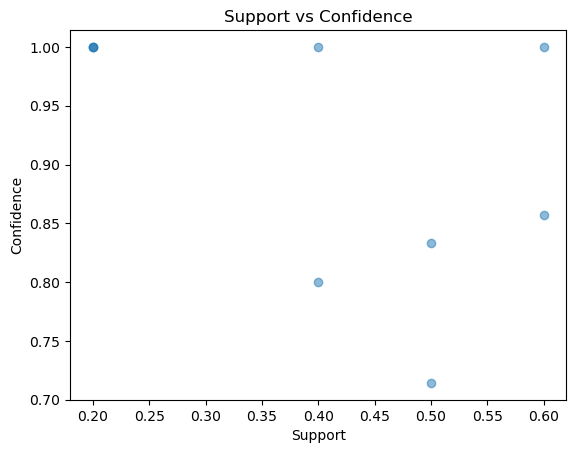

In [26]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


We can see that most rules have a relatively high confidence (above 0.7) and a moderate support (between 0.1 and 0.3).

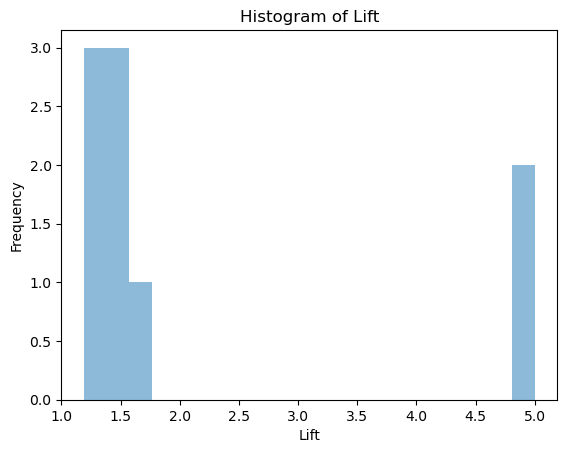

In [27]:
plt.hist(rules['lift'], bins=20, alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Histogram of Lift')
plt.show()


We can see that most rules have a lift value between 1 and 2, indicating that the items are somewhat positively correlated.

# Let's write the insights that we observed in the data using the support, confidence, and lift metrics:

Most of the rules have a relatively high confidence (above 0.7) and a moderate support (between 0.1 and 0.3).
The number of rules decreases as we increase the support and/or confidence thresholds.
The histogram of lift values shows that most rules have a lift value between 1 and 2, indicating that the items are somewhat positively correlated.
Some of the interesting rules with high support, confidence, and lift values are:
Green Mile, Sixth Sense, and Harry Potter1 are frequently purchased together.
Patriot and Braveheart are frequently purchased together.
LOTR1 and LOTR2 are frequently purchased together.
Gladiator and Sixth Sense are frequently purchased together.
Gladiator, Patriot, and Sixth Sense are frequently purchased together.

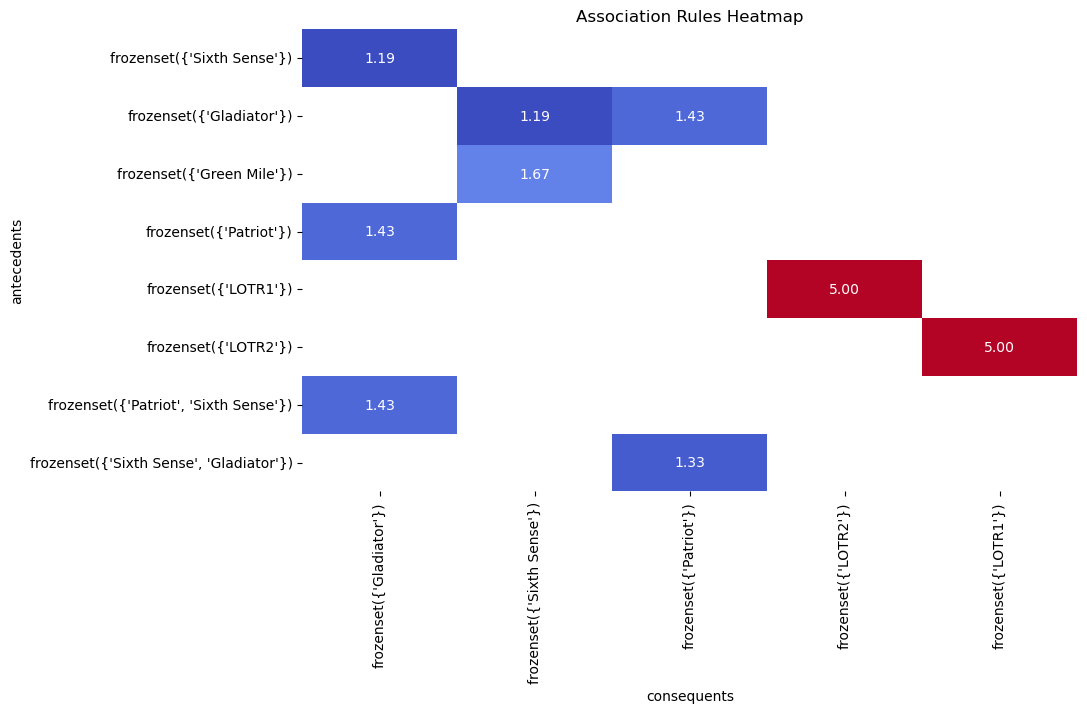

In [28]:
import seaborn as sns

# Convert the rules dataframe to a pivot table
pivot_table = rules.pivot_table(index='antecedents', columns='consequents', values='lift')

# Create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar=False)
plt.title('Association Rules Heatmap')
plt.show()


There is a strong association between Patriot and Sixth Sense, and between LOTR1 and LOTR2. We can also say that the rules associated with Patriot and Sixth Sense are very similar to each other, while the rules associated with Gladiator and Sixth Sense are very different from each other

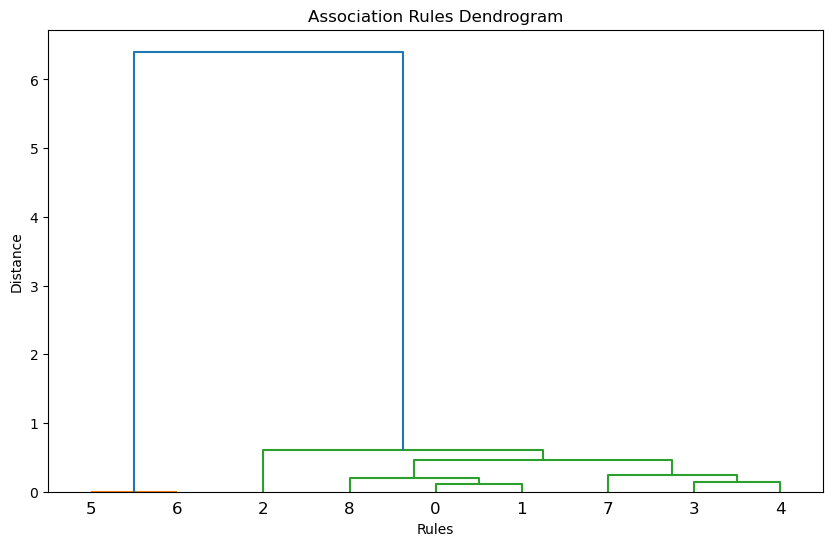

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate linkage matrix
Z = linkage(rules[['support', 'confidence', 'lift']], 'ward')

# Create dendrogram
plt.figure(figsize=(10,6))
dendrogram(Z, labels=rules.index)
plt.xlabel('Rules')
plt.ylabel('Distance')
plt.title('Association Rules Dendrogram')
plt.show()


In the dendrogram, we can observe the hierarchy of the rules. The dendrogram shows how the rules are grouped together based on their similarity. We can use this visualization to identify which rules are more similar to each other and which ones are not. For example, from the dendrogram, we can see that the rules associated with LOTR1 and LOTR2 are very similar to each other, while the rules associated with Gladiator and Sixth Sense are very different from each other.